In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gt=pd.read_csv("D:/Vivek/assingment/16 Neural Networks/gas_turbines.csv")

In [3]:
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

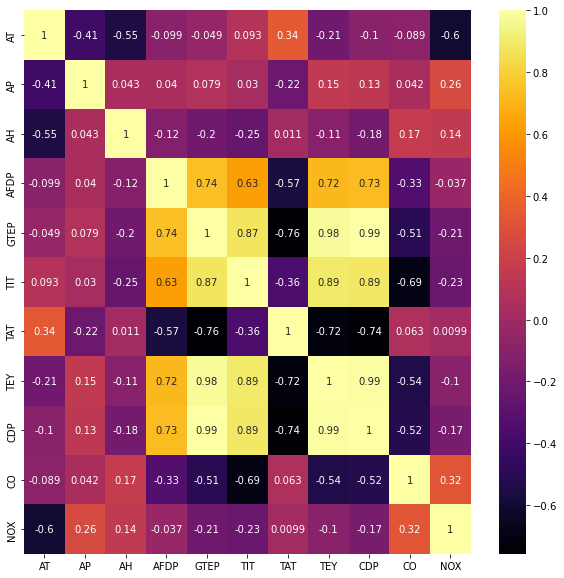

In [6]:

plt.figure(figsize=(10,10))
sns.heatmap(gt.corr(),annot=True,cmap="inferno")

In [7]:
X=gt.drop('TEY',axis=1)
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [8]:
Y=gt['TEY']
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [9]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x_scaled


array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [10]:
scaled_gasturbines_data=pd.DataFrame(x_scaled,columns=X.columns)
scaled_gasturbines_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [11]:
X_transformed=scaled_gasturbines_data
X_transformed

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X_transformed,Y,test_size=0.20,random_state=123)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12031, 10)
(3008, 10)
(12031,)
(3008,)


In [14]:
model=Sequential()
model.add(Dense(units=10,input_dim=10,activation ='relu',kernel_initializer='normal'))
model.add(Dense(units=6,activation='tanh',kernel_initializer='normal'))
model.add(Dense(units=1,activation='relu',kernel_initializer='normal'))

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mse'])

In [16]:
model.fit(X_train,Y_train, epochs=100, batch_size=20)

Epoch 1/100
602/602 [==============================] - 1s 2ms/step - loss: -711.0209 - mse: 18049.8574
Epoch 2/100
602/602 [==============================] - 1s 1ms/step - loss: -2029.5946 - mse: 17859.0898
Epoch 3/100
602/602 [==============================] - 1s 1ms/step - loss: -2029.7247 - mse: 17856.4609
Epoch 4/100
602/602 [==============================] - 1s 2ms/step - loss: -2030.0983 - mse: 17847.6816
Epoch 5/100
602/602 [==============================] - 1s 2ms/step - loss: -2030.0991 - mse: 17847.4824
Epoch 6/100
602/602 [==============================] - 1s 2ms/step - loss: -2030.1069 - mse: 17845.1836
Epoch 7/100
602/602 [==============================] - 1s 2ms/step - loss: -2030.2367 - mse: 17844.8887
Epoch 8/100
602/602 [==============================] - 1s 1ms/step - loss: -2030.2365 - mse: 17844.8887
Epoch 9/100
602/602 [==============================] - 1s 2ms/step - loss: -2030.2369 - mse: 17844.8965
Epoch 10/100
602/602 [==============================] - 1s 2ms/st

602/602 [==============================] - 1s 1ms/step - loss: -2030.2362 - mse: 17844.8965
Epoch 80/100
602/602 [==============================] - 1s 1ms/step - loss: -2030.2357 - mse: 17844.8789
Epoch 81/100
602/602 [==============================] - 1s 1ms/step - loss: -2030.2357 - mse: 17844.8867
Epoch 82/100
602/602 [==============================] - 1s 2ms/step - loss: -2030.2366 - mse: 17844.8828
Epoch 83/100
602/602 [==============================] - 1s 1ms/step - loss: -2030.2367 - mse: 17844.8906
Epoch 84/100
602/602 [==============================] - 1s 1ms/step - loss: -2030.2374 - mse: 17844.8848
Epoch 85/100
602/602 [==============================] - 1s 1ms/step - loss: -2030.2375 - mse: 17844.8887
Epoch 86/100
602/602 [==============================] - 1s 1ms/step - loss: -2030.2362 - mse: 17844.8906
Epoch 87/100
602/602 [==============================] - 1s 1ms/step - loss: -2030.2371 - mse: 17844.9004
Epoch 88/100
602/602 [==============================] - 1s 1ms/step 

In [17]:
scores = model.evaluate(X_test,Y_test)
print((model.metrics_names[1]))

94/94 [==============================] - 0s 1ms/step - loss: -2033.6545 - mse: 17907.7266
mse
